In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep
from iminuit import Minuit
from iminuit.cost import LeastSquares
import pickle
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'
plt.rcParams['savefig.bbox'] = 'tight'
hep.style.use(hep.style.CMS)

In [156]:
with open("HG63LG63BeamCal2.pkl", 'rb') as file:
    # Load the data from the pickle file
    din = pickle.load(file)

with open("geometry.pkl", 'rb') as file:
        geometry = pickle.load(file)

In [159]:
def get_chIDs_by_layer(df, layer_number):
    ch_ids = df[df['Layer'] == layer_number]['Ch#'].nsmallest(25).tolist()
    return ch_ids

In [160]:
def get_LG_array_by_layer(geometry, din):
    all_layers = sorted(geometry['Layer'].unique())
    layer_data = []

    for layer in all_layers:
        ch_ids = get_chIDs_by_layer(geometry, layer)
        combined = [din[f"{ID}_LG"] for ID in ch_ids if f"{ID}_LG" in din]
        if combined:
            layer_data.append(np.concatenate(combined))
        else:
            layer_data.append(np.array([]))  # empty array if no matches

    return layer_data

In [161]:
layer_arrays = get_LG_array_by_layer(geometry, din)

In [167]:
def plot_layer_histograms(layer_arrays, bins=200, range_=(0, 500)):
    fig, axes = plt.subplots(5, 3, figsize=(15, 12), sharex=True, sharey=True)
    axes = axes.flatten()

    for i, data in enumerate(layer_arrays):
        if len(data) == 0:
            continue  # Skip empty layers
        counts, bin_edges = np.histogram(data, bins=bins, range=range_)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        errors = np.sqrt(counts)

        axes[i].errorbar(bin_centers, counts, yerr=errors, fmt='o', markersize=2, label=f'Layer {i}')
        #axes[i].set_title(f'Layer {i}')
        axes[i].legend()
        axes[i].set_yscale("log")
        axes[i].set_ylim(1,400)

    for ax in axes[-5:]:  # Bottom row (x-axis label)
        ax.set_xlabel("MIP", fontsize=20)
    
    for ax in axes[::3]:  # Left column (y-axis label)
        ax.set_ylabel("Count", fontsize=20)
        
    fig.suptitle("Beam On LG Hits", fontsize=26, y=1.0)
    plt.tight_layout(pad=0.0)

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

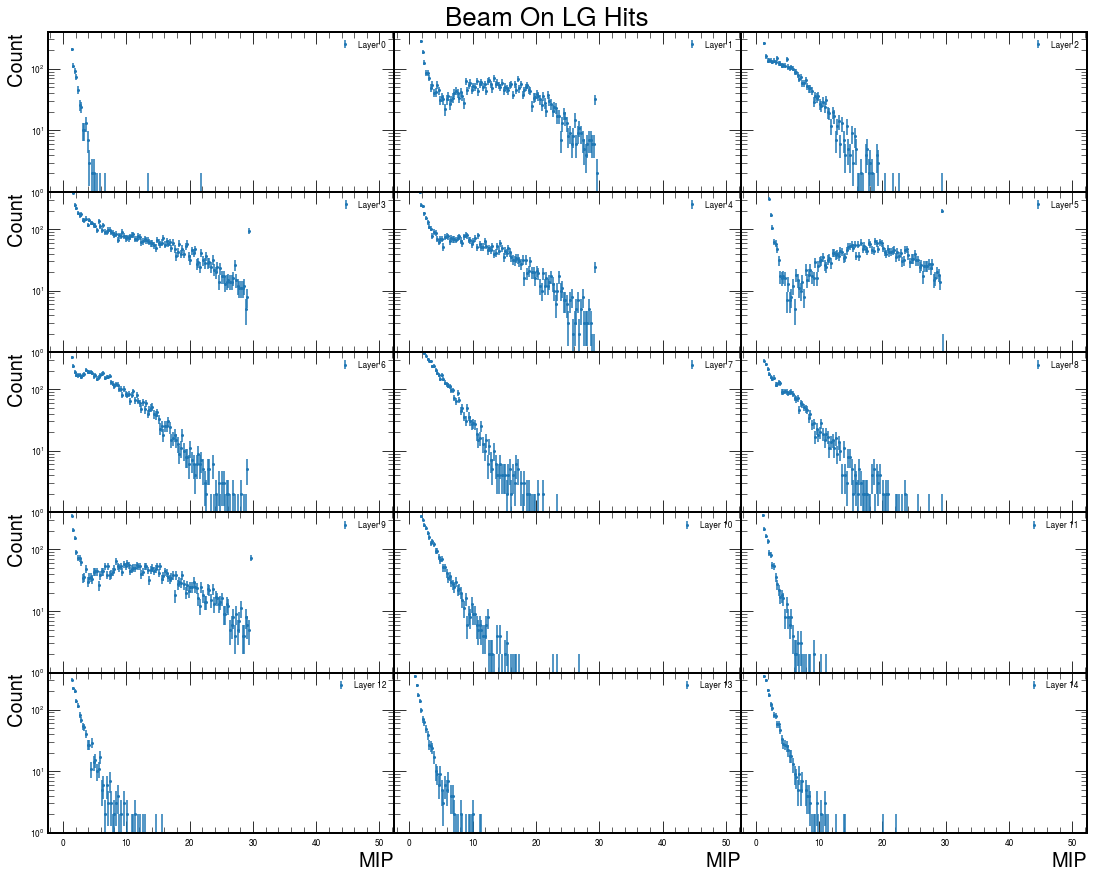

In [168]:
plot_layer_histograms(layer_arrays, bins=200, range_=(0, 50))

In [164]:
def plot_channel_histograms_by_layer(geometry, din, layer, bins=200, range_=(0, 5000)):
    ch_ids = get_chIDs_by_layer(geometry, layer)

    fig, axes = plt.subplots(5, 5, figsize=(15, 12), sharex=True, sharey=True)
    axes = axes.flatten()

    for i, ch_id in enumerate(ch_ids):
        key = f"{ch_id}_LG"
        ax = axes[i]

        if key not in din or len(din[key]) == 0:
            ax.axis("off")
            continue

        data = np.array(din[key])
        counts, bin_edges = np.histogram(data, bins=bins, range=range_)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        errors = np.sqrt(counts)

        ax.errorbar(bin_centers, counts, yerr=errors, fmt='o', markersize=2, label=f"chID {ch_id}")
        ax.set_yscale("log")
        ax.set_ylim(10, 4000)
        ax.legend()
        

    # Turn off any unused axes if fewer than 25
    for j in range(len(ch_ids), 25):
        axes[j].axis("off")
    for ax in axes[-5:]:  # Bottom row (x-axis label)
        ax.set_xlabel("MIPs", fontsize=20)
    
    for ax in axes[::5]:  # Left column (y-axis label)
        ax.set_ylabel("Count", fontsize=20)
    fig.suptitle(f"Layer {layer} - LG Hits", fontsize=26, y=1)

    plt.tight_layout(pad=0.0)
    plt.tight_layout(rect=[0, 0, 1.5, 1])
    plt.subplots_adjust(wspace=0, hspace=0)
    
    plt.show()


0_LG
1_LG
2_LG
3_LG
4_LG
5_LG
6_LG
7_LG
8_LG
9_LG
10_LG
11_LG
12_LG
13_LG
14_LG
15_LG
16_LG
17_LG
18_LG
19_LG
20_LG
21_LG
22_LG
23_LG
24_LG


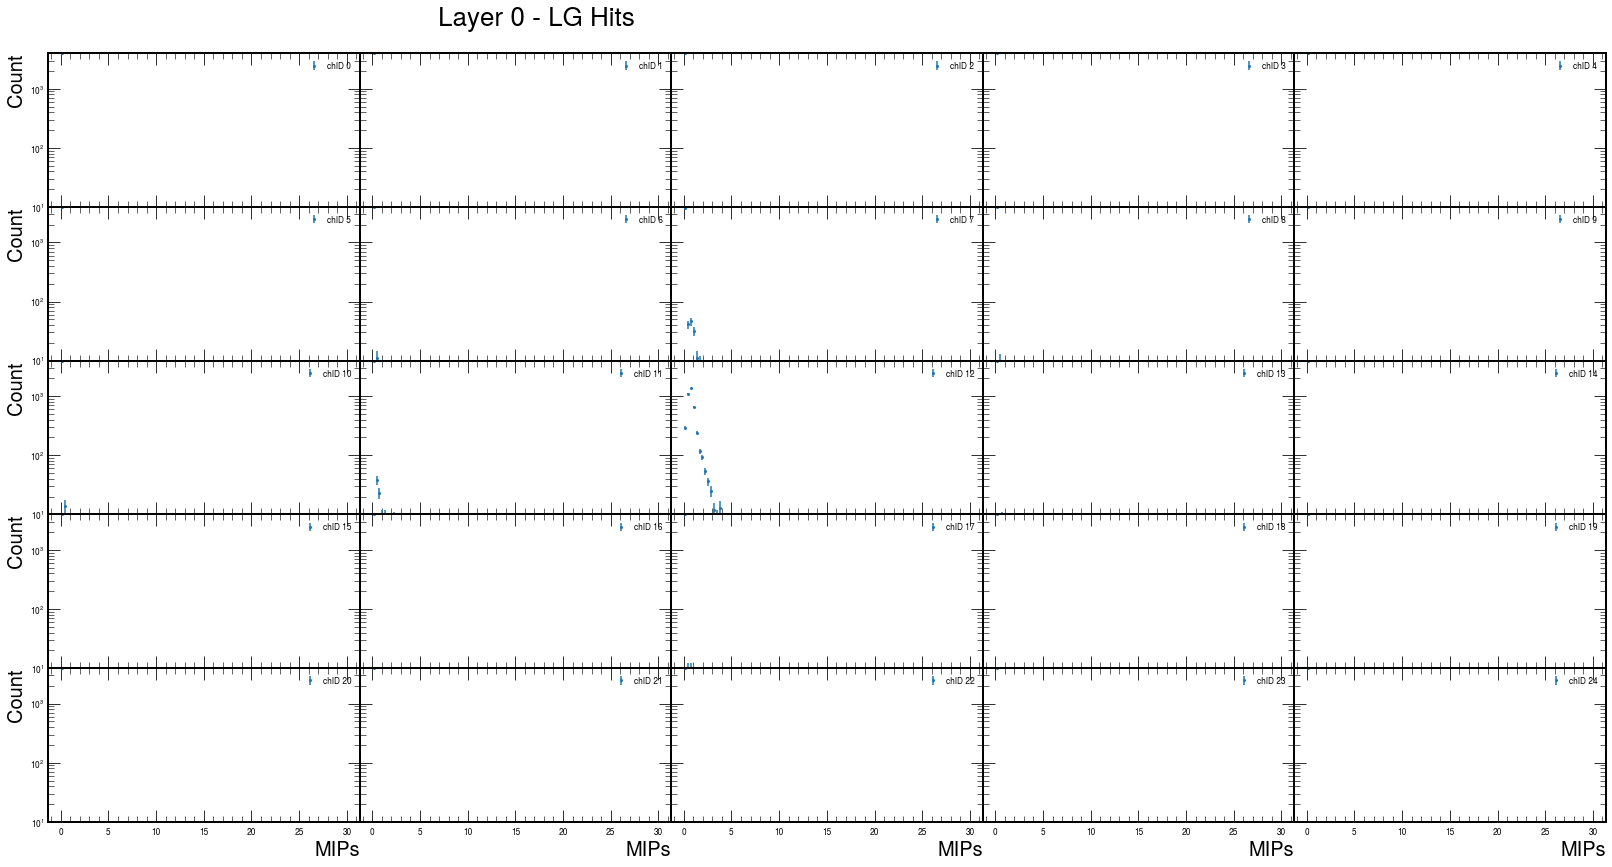

64_LG
65_LG
66_LG
67_LG
68_LG
69_LG
70_LG
71_LG
72_LG
73_LG
74_LG
75_LG
76_LG
77_LG
78_LG
79_LG
80_LG
81_LG
82_LG
83_LG
84_LG
85_LG
86_LG
87_LG
88_LG


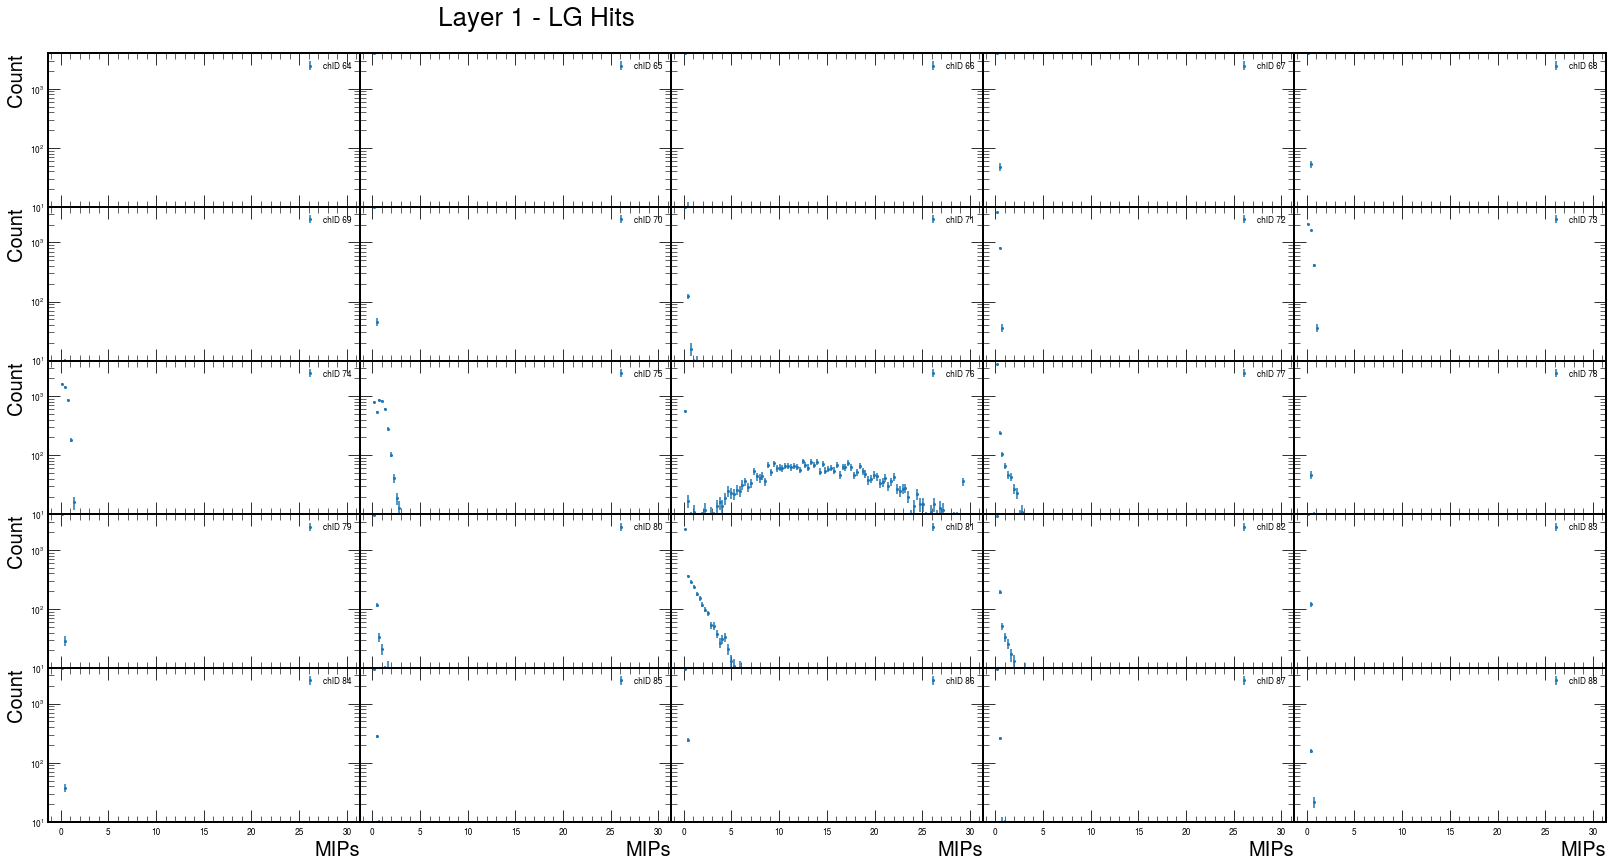

25_LG
26_LG
27_LG
28_LG
29_LG
30_LG
31_LG
32_LG
33_LG
34_LG
35_LG
36_LG
37_LG
38_LG
39_LG
40_LG
41_LG
42_LG
43_LG
44_LG
45_LG
46_LG
47_LG
48_LG
49_LG


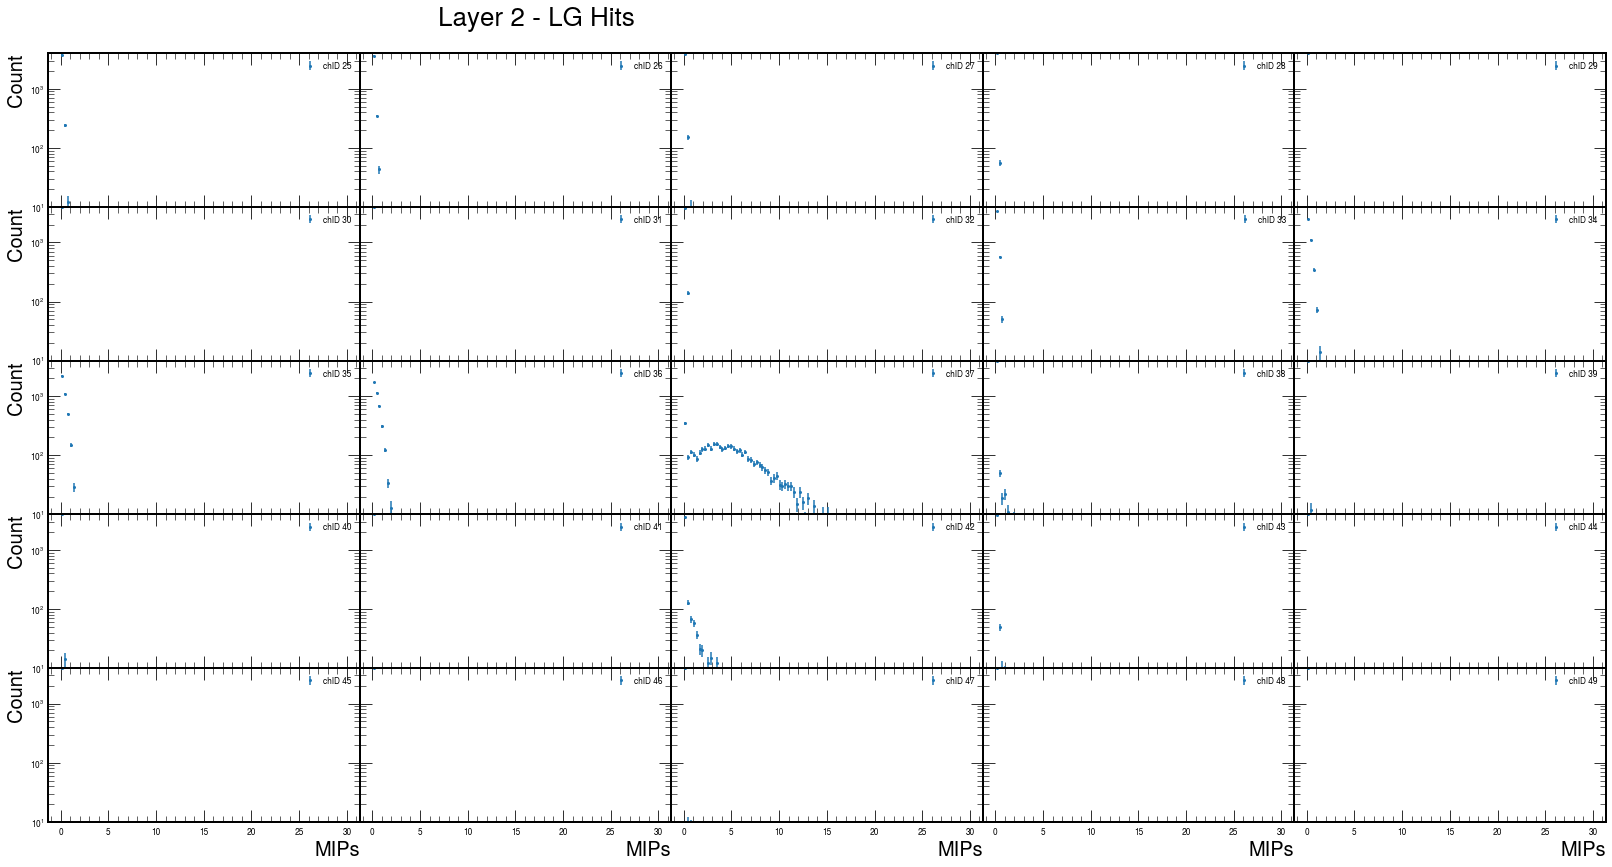

89_LG
90_LG
91_LG
92_LG
93_LG
94_LG
95_LG
96_LG
97_LG
98_LG
99_LG
100_LG
101_LG
102_LG
103_LG
104_LG
105_LG
106_LG
107_LG
108_LG
109_LG
110_LG
111_LG
112_LG
113_LG


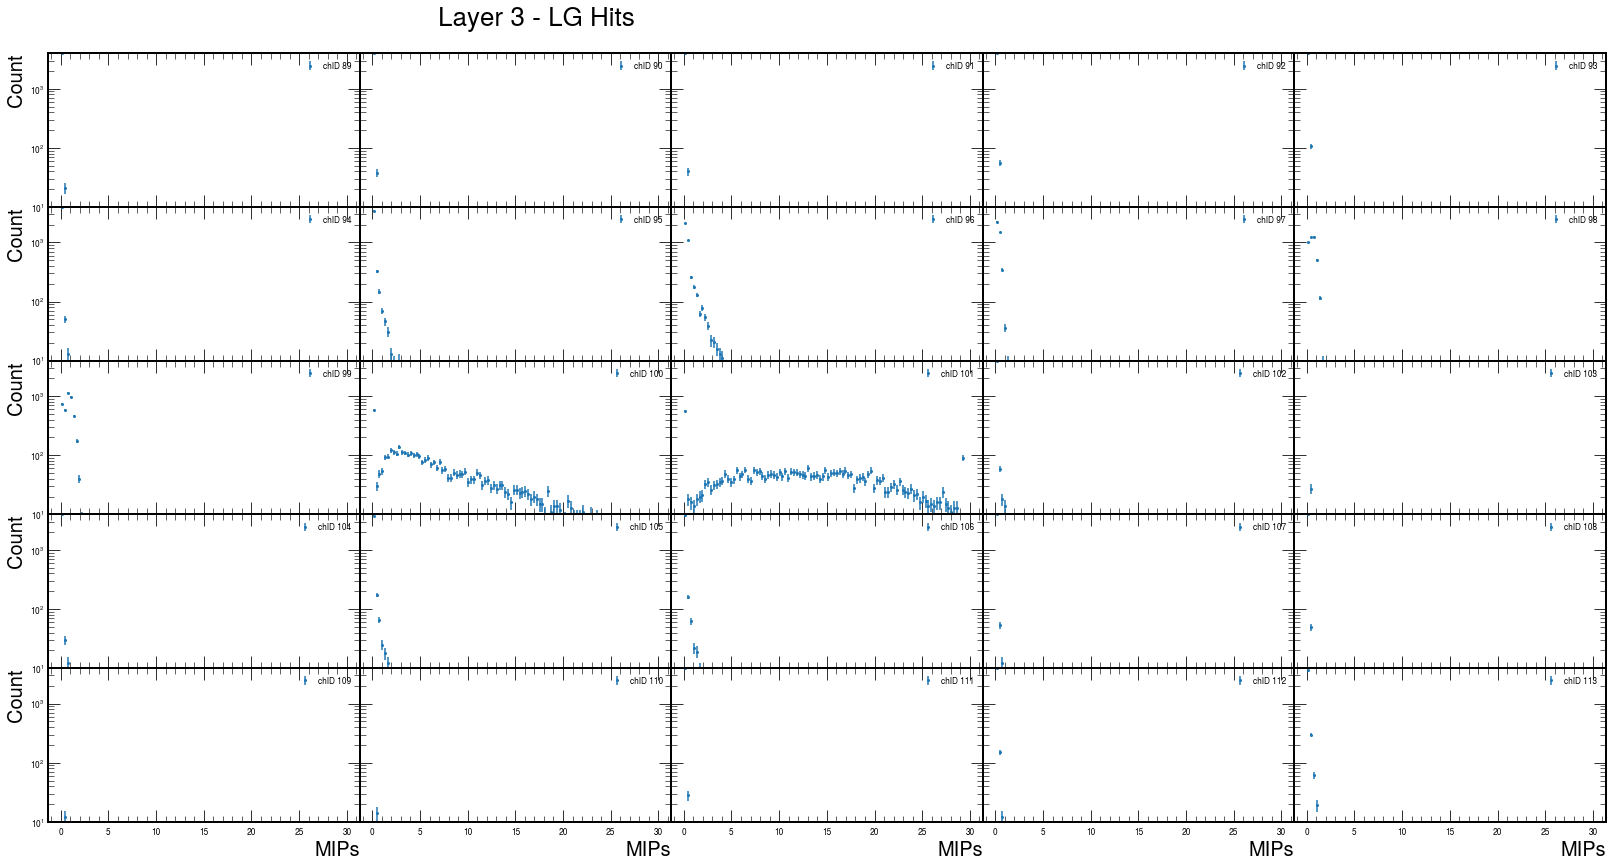

50_LG
51_LG
52_LG
53_LG
54_LG
55_LG
56_LG
57_LG
58_LG
59_LG
60_LG
61_LG
62_LG
63_LG
114_LG
115_LG
116_LG
117_LG
118_LG
119_LG
120_LG
121_LG
122_LG
123_LG
124_LG


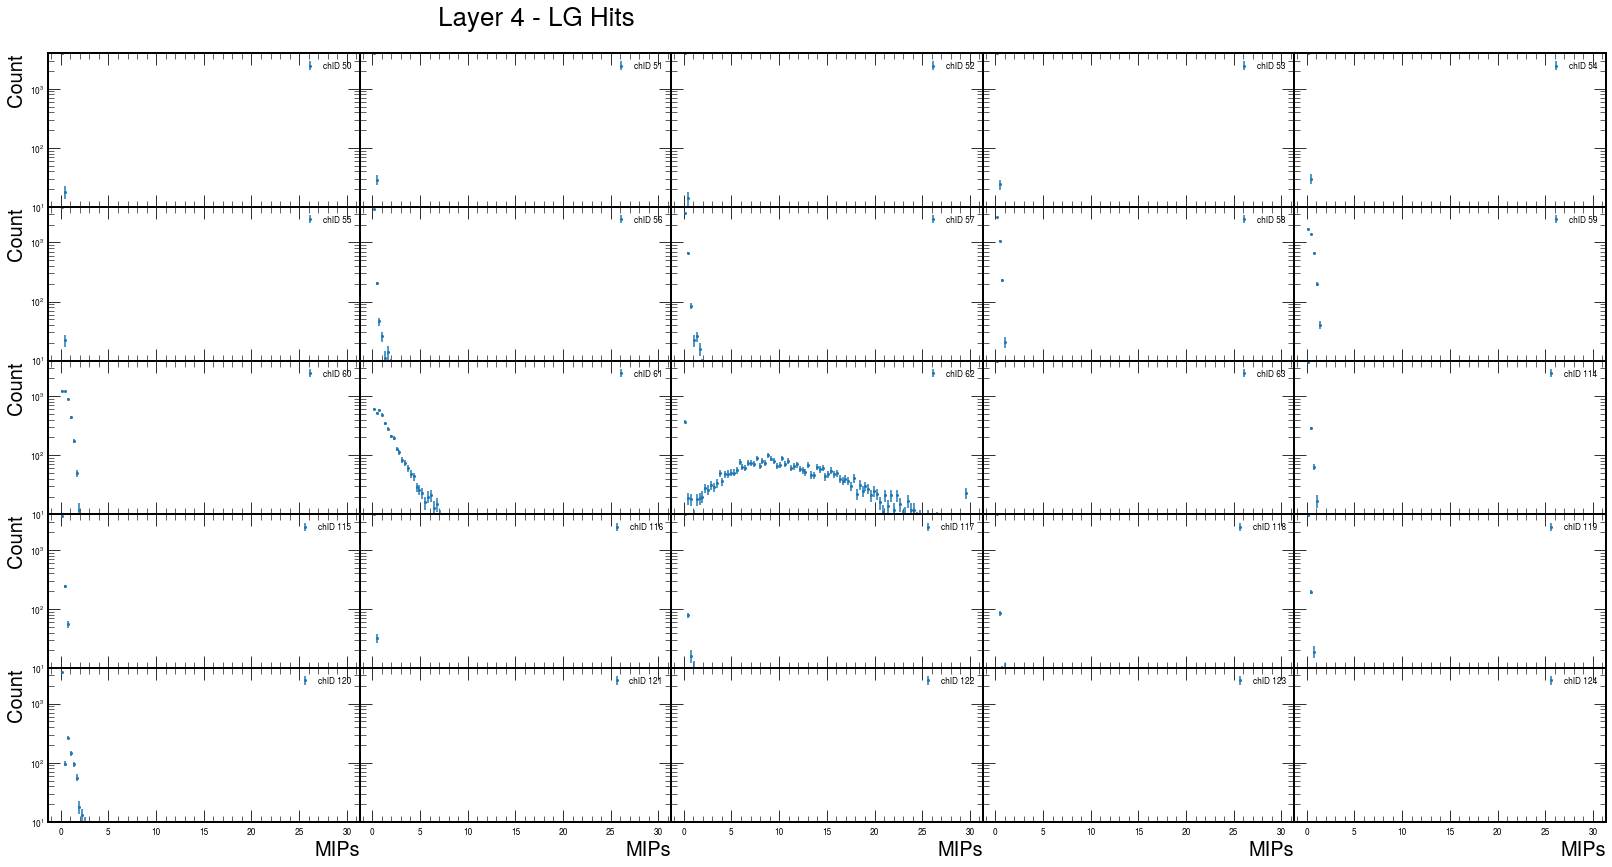

128_LG
129_LG
130_LG
131_LG
132_LG
133_LG
134_LG
135_LG
136_LG
137_LG
138_LG
139_LG
140_LG
141_LG
142_LG
143_LG
144_LG
145_LG
146_LG
147_LG
148_LG
149_LG
150_LG
151_LG
152_LG


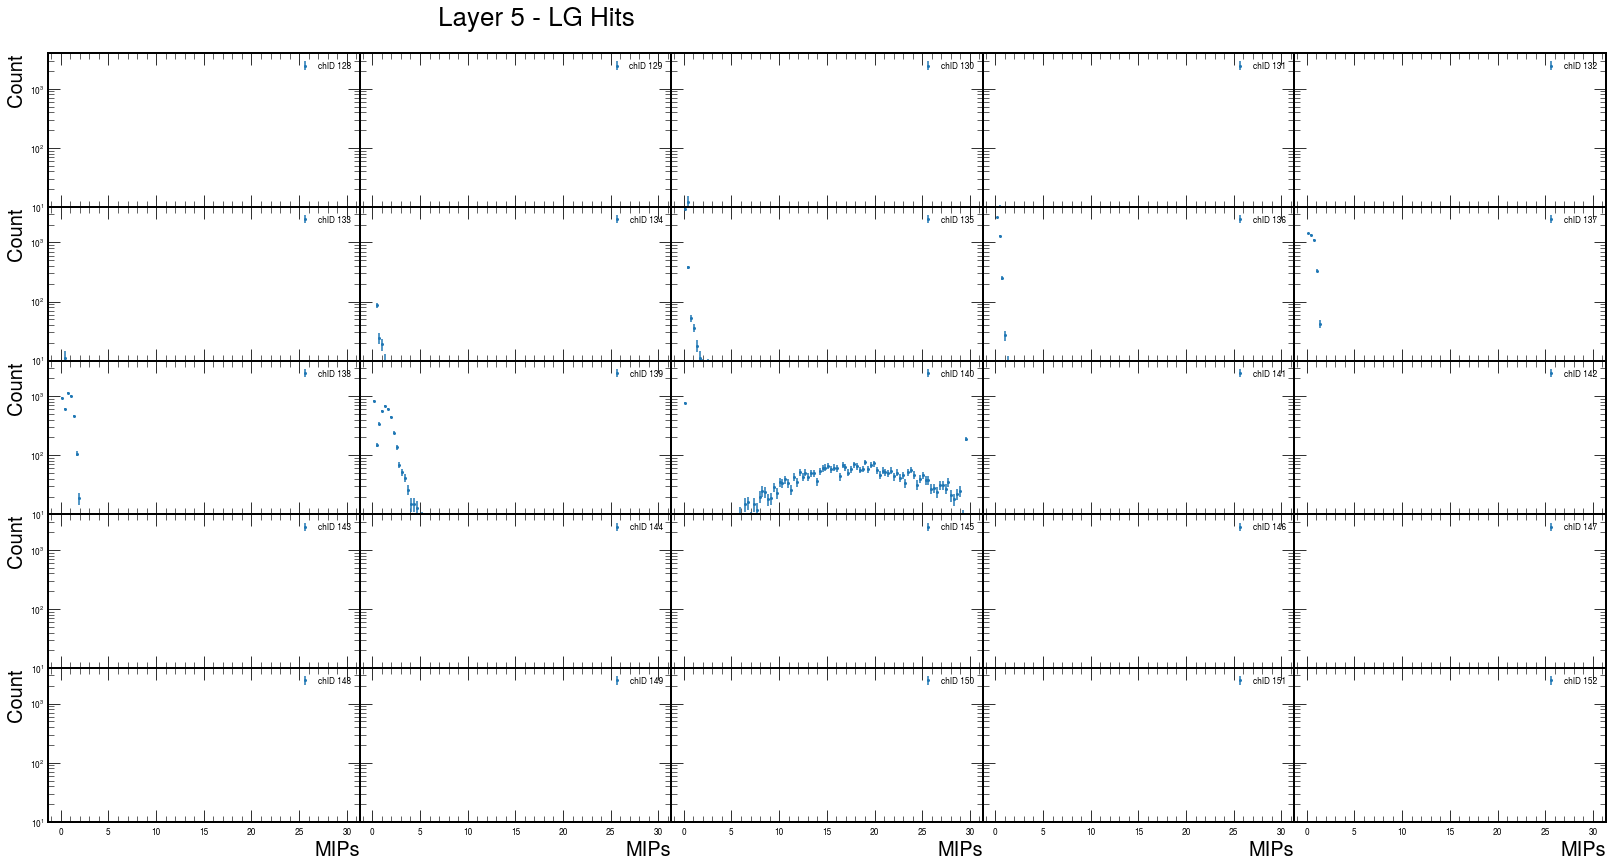

153_LG
154_LG
155_LG
156_LG
157_LG
158_LG
159_LG
160_LG
161_LG
162_LG
163_LG
164_LG
165_LG
166_LG
167_LG
168_LG
169_LG
170_LG
171_LG
172_LG
173_LG
174_LG
175_LG
176_LG
177_LG


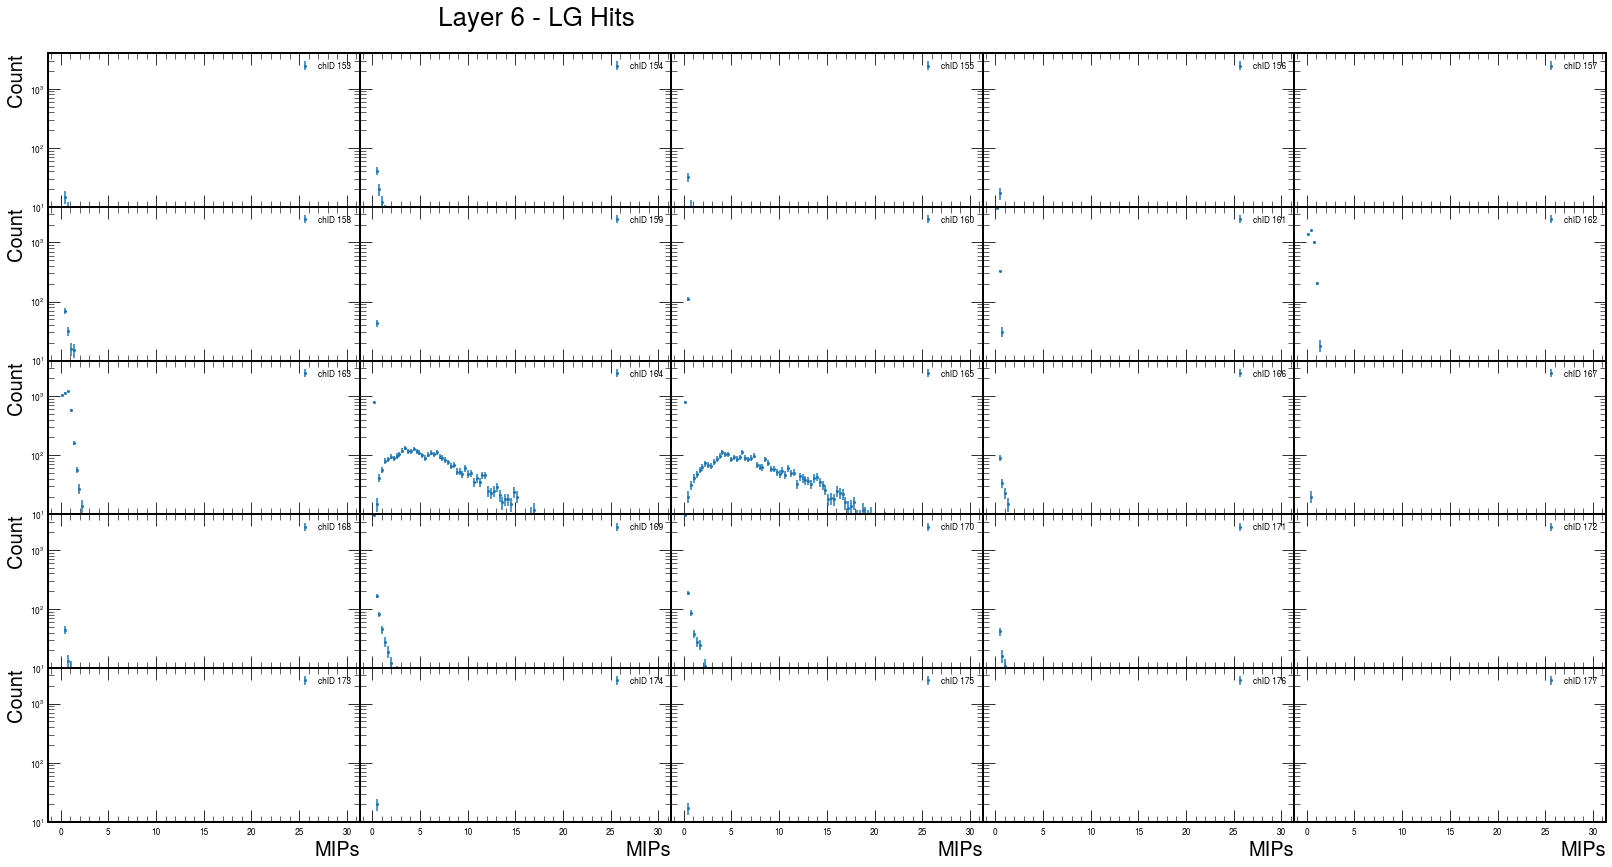

192_LG
193_LG
194_LG
195_LG
196_LG
197_LG
198_LG
199_LG
200_LG
201_LG
202_LG
203_LG
204_LG
205_LG
206_LG
207_LG
208_LG
209_LG
210_LG
211_LG
212_LG
213_LG
214_LG
215_LG
216_LG


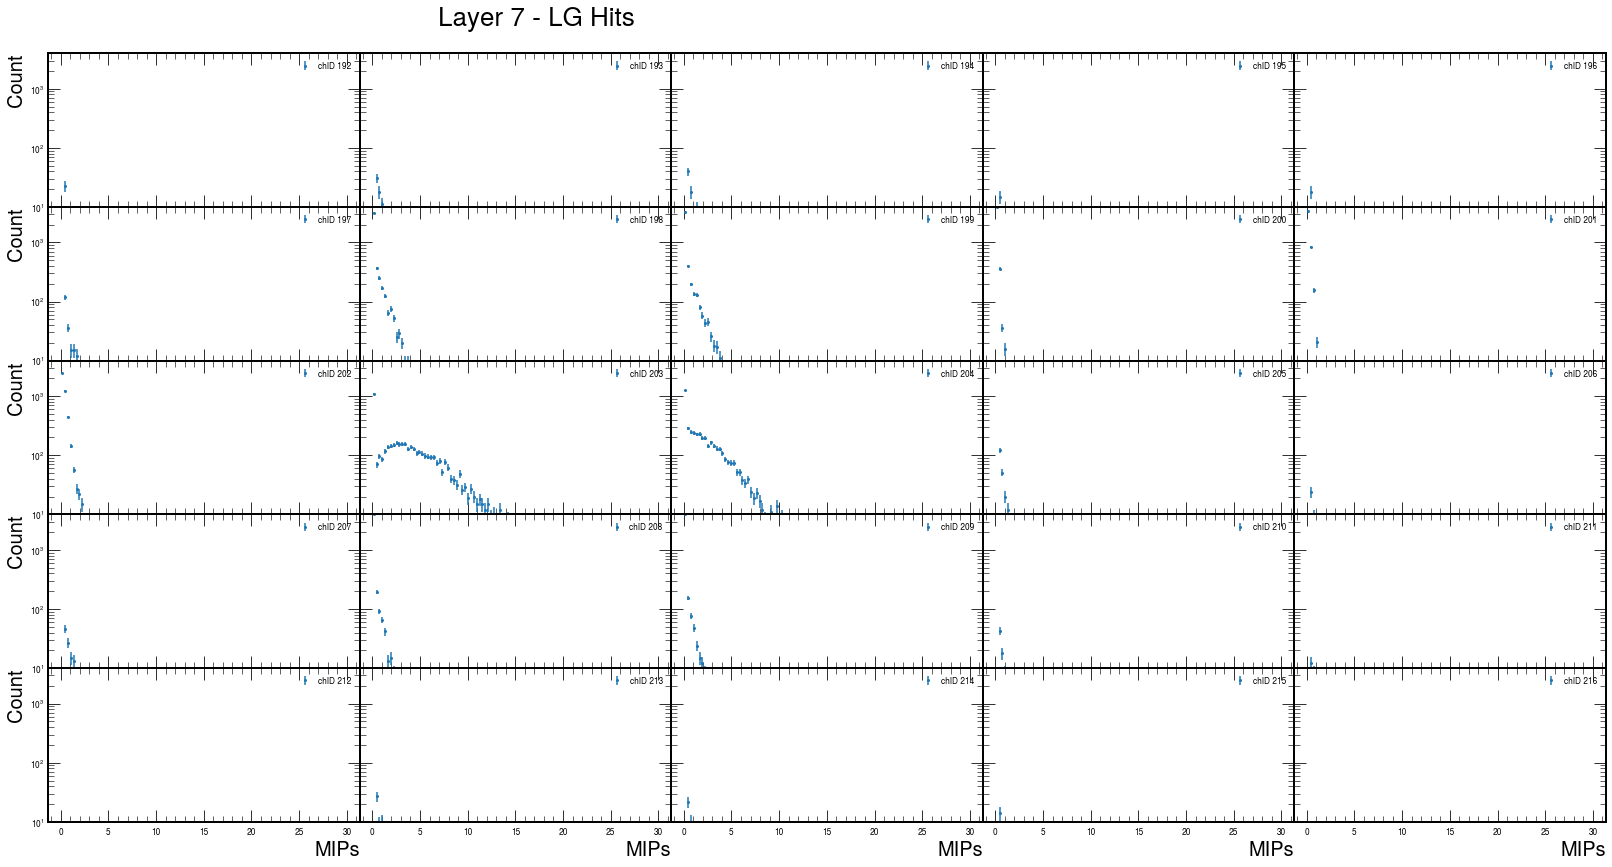

217_LG
218_LG
219_LG
220_LG
221_LG
222_LG
223_LG
224_LG
225_LG
226_LG
227_LG
228_LG
229_LG
230_LG
231_LG
232_LG
233_LG
234_LG
235_LG
236_LG
237_LG
238_LG
239_LG
240_LG
241_LG


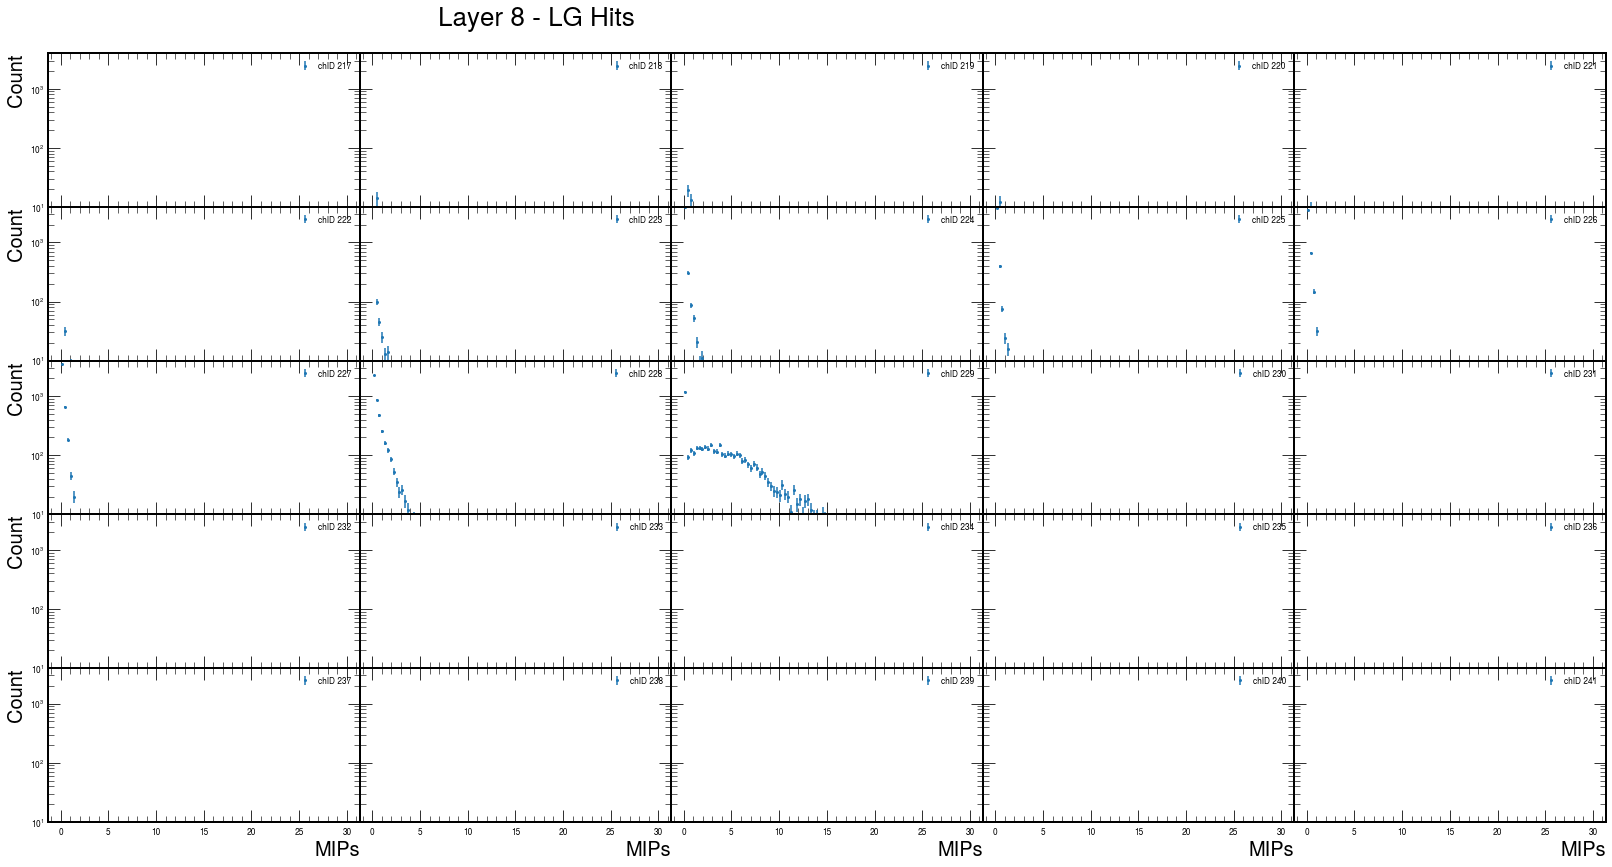

178_LG
179_LG
180_LG
181_LG
182_LG
183_LG
184_LG
185_LG
186_LG
187_LG
188_LG
189_LG
190_LG
191_LG
242_LG
243_LG
244_LG
245_LG
246_LG
247_LG
248_LG
249_LG
250_LG
251_LG
252_LG


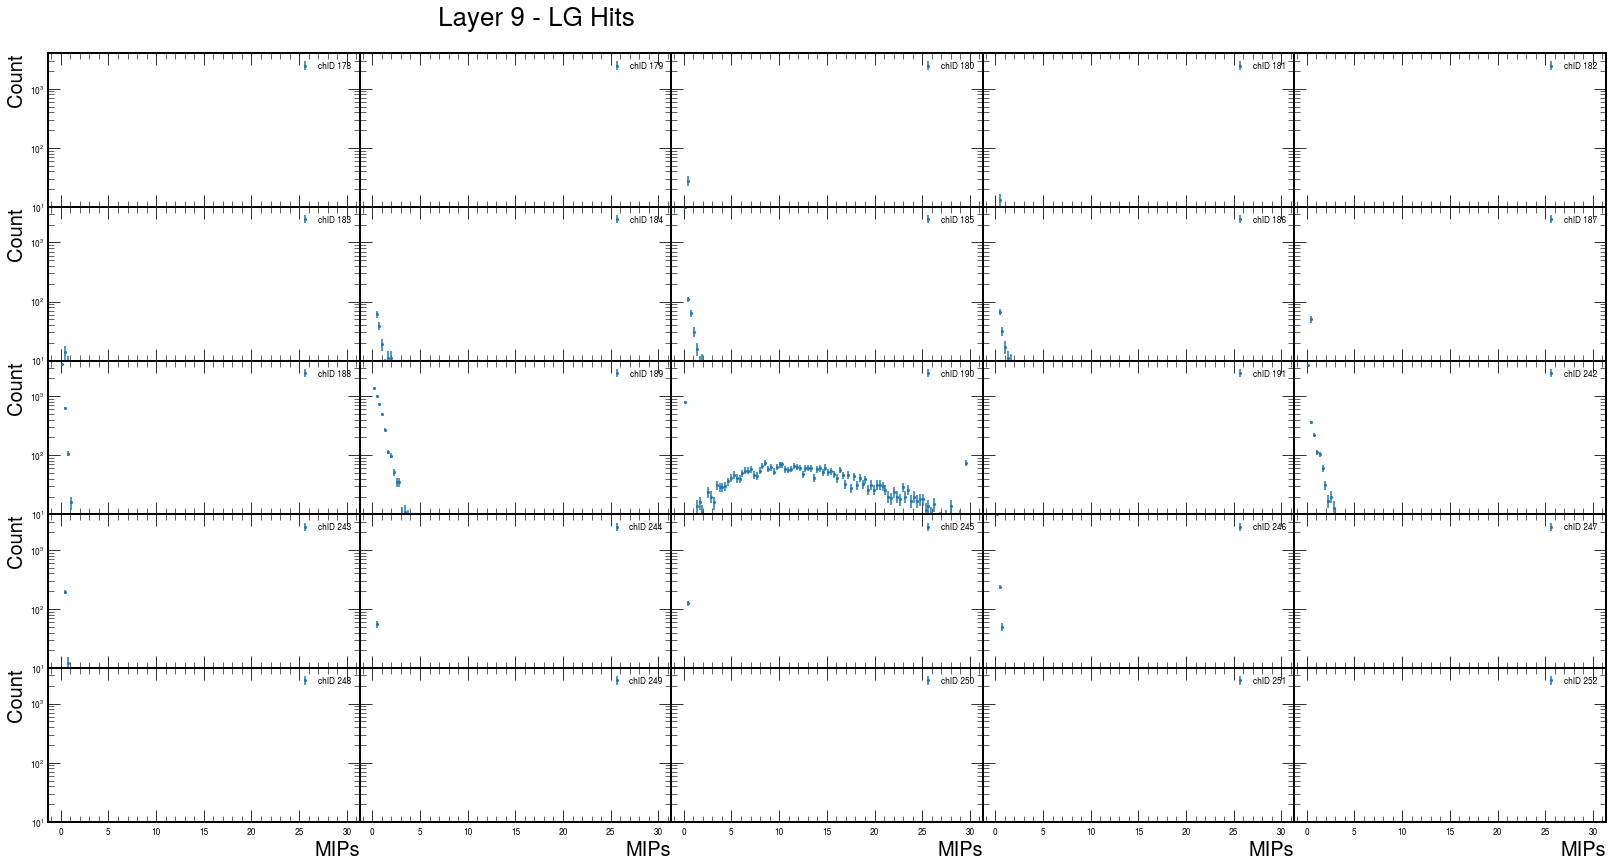

256_LG
257_LG
258_LG
259_LG
260_LG
261_LG
262_LG
263_LG
264_LG
265_LG
266_LG
267_LG
268_LG
269_LG
270_LG
271_LG
272_LG
273_LG
274_LG
275_LG
276_LG
277_LG
278_LG
279_LG
280_LG


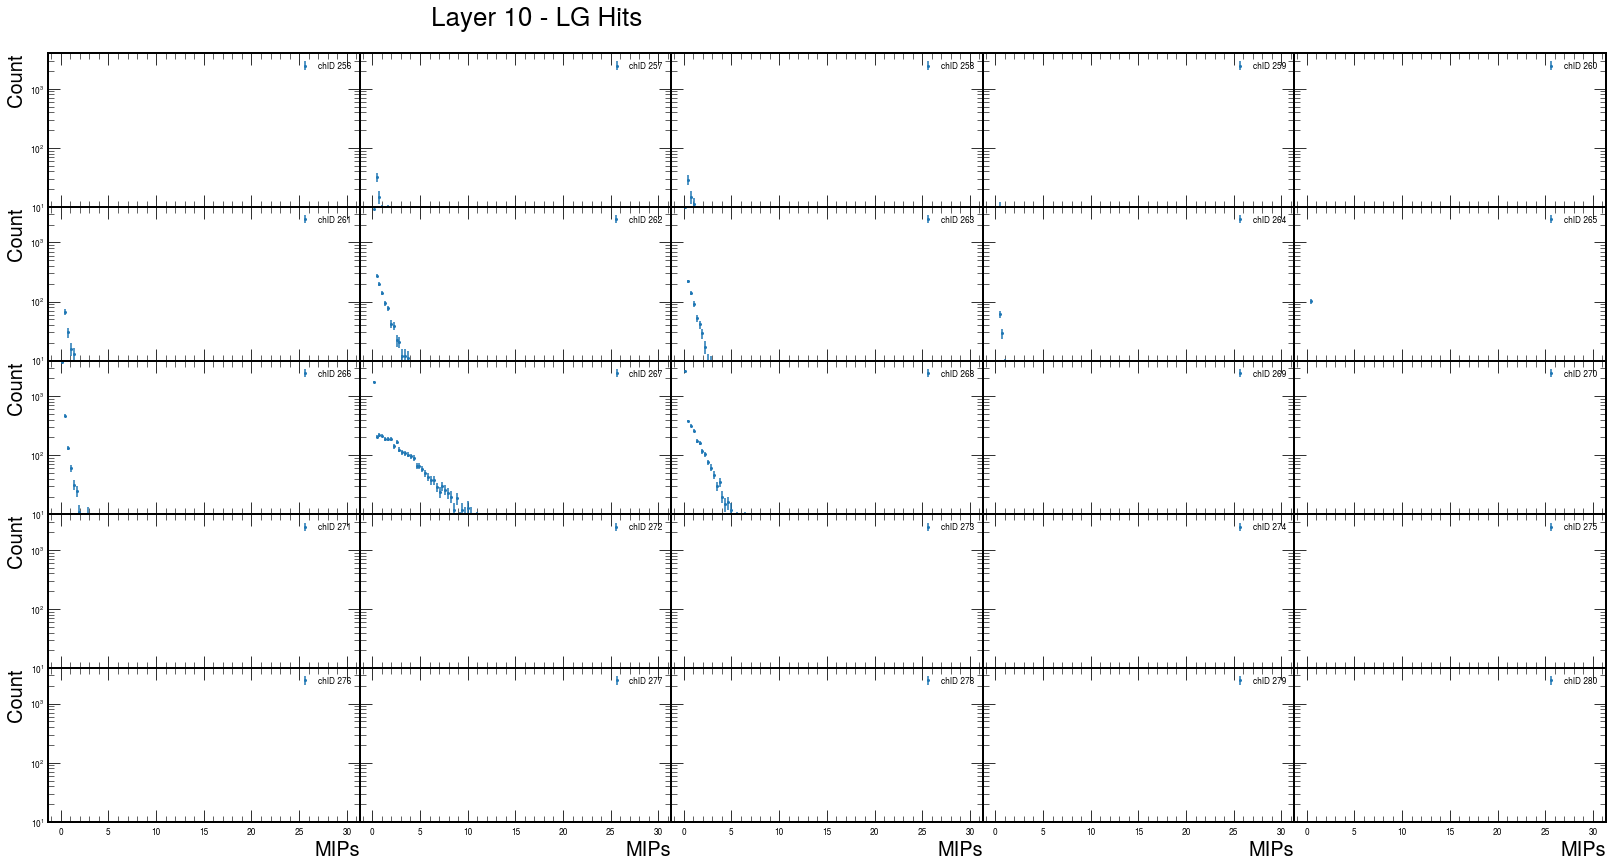

281_LG
282_LG
283_LG
284_LG
285_LG
286_LG
287_LG
288_LG
289_LG
290_LG
291_LG
292_LG
293_LG
294_LG
295_LG
296_LG
297_LG
298_LG
299_LG
300_LG
301_LG
302_LG
303_LG
304_LG
305_LG


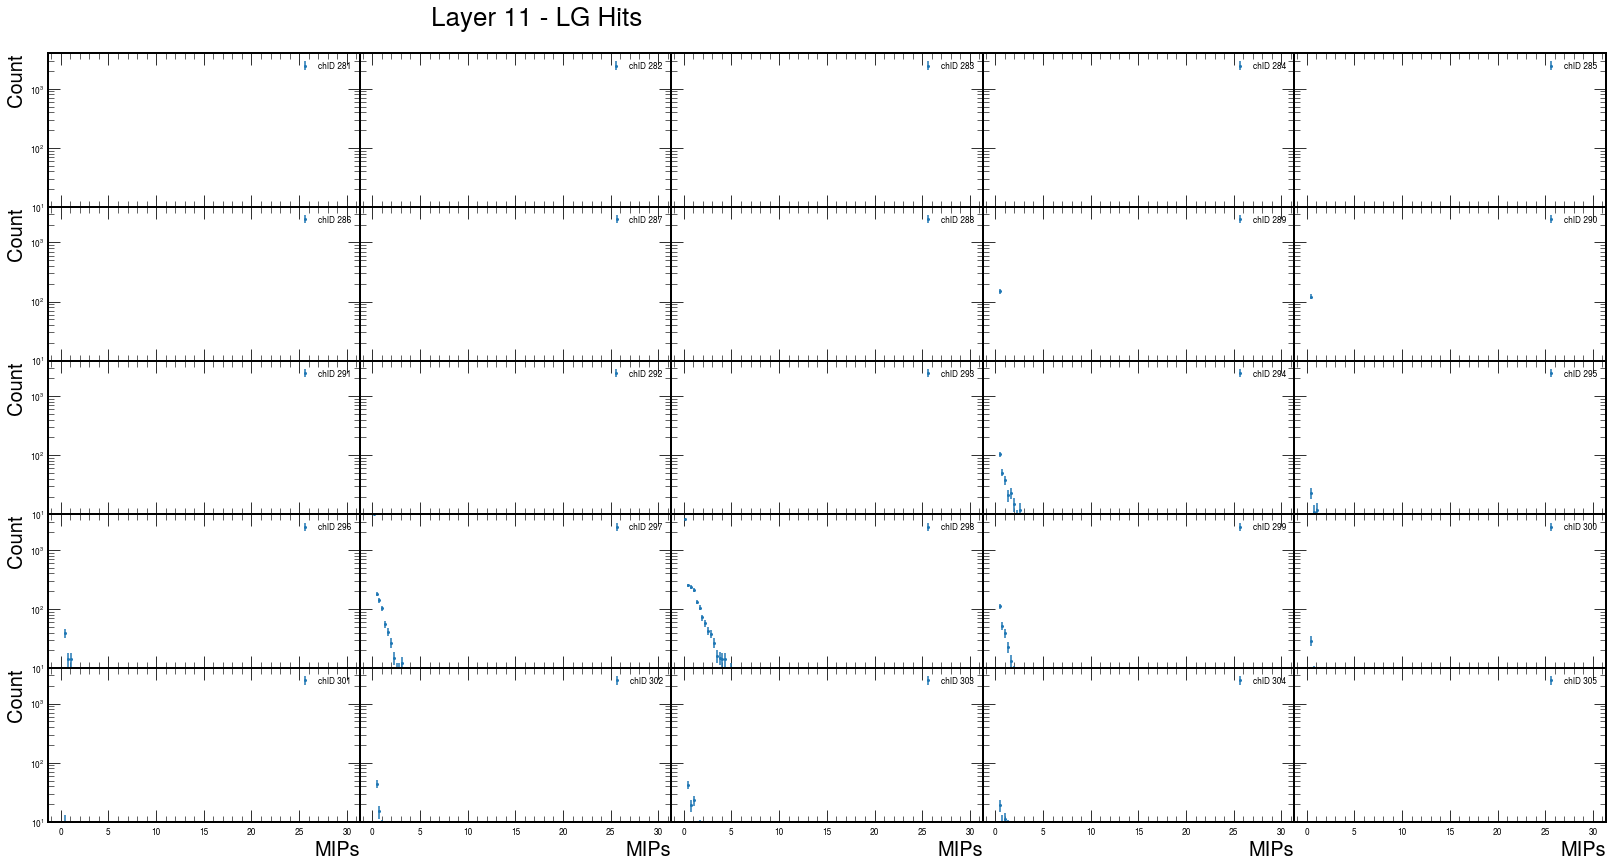

320_LG
321_LG
322_LG
323_LG
324_LG
325_LG
326_LG
327_LG
328_LG
329_LG
330_LG
331_LG
332_LG
333_LG
334_LG
335_LG
336_LG
337_LG
338_LG
339_LG
340_LG
341_LG
342_LG
343_LG
344_LG


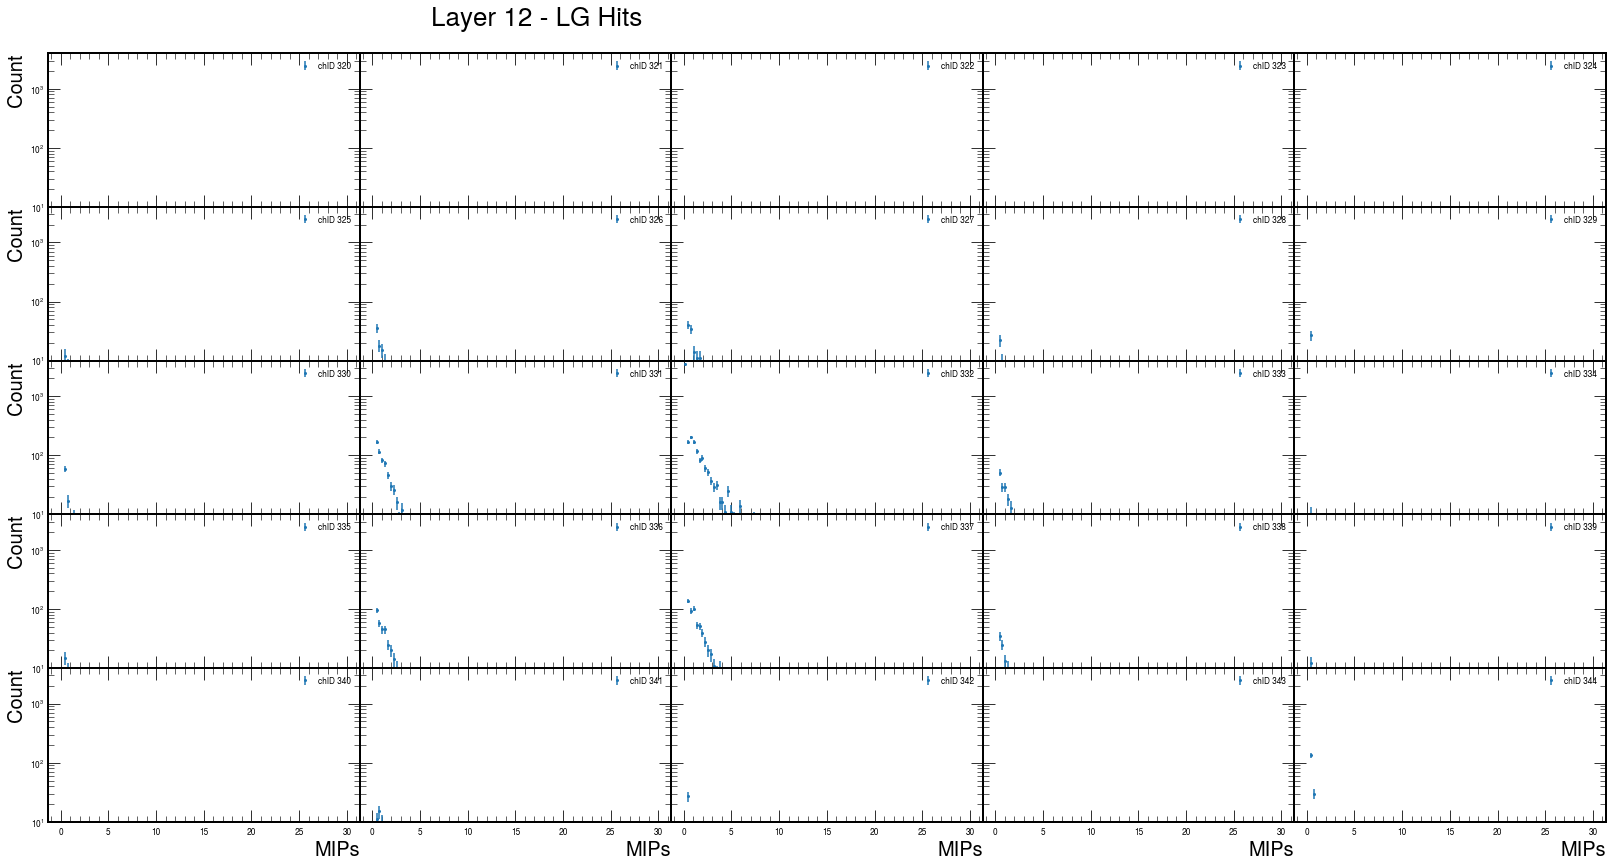

345_LG
346_LG
347_LG
348_LG
349_LG
350_LG
351_LG
352_LG
353_LG
354_LG
355_LG
356_LG
357_LG
358_LG
359_LG
360_LG
361_LG
362_LG
363_LG
364_LG
365_LG
366_LG
367_LG
368_LG
369_LG


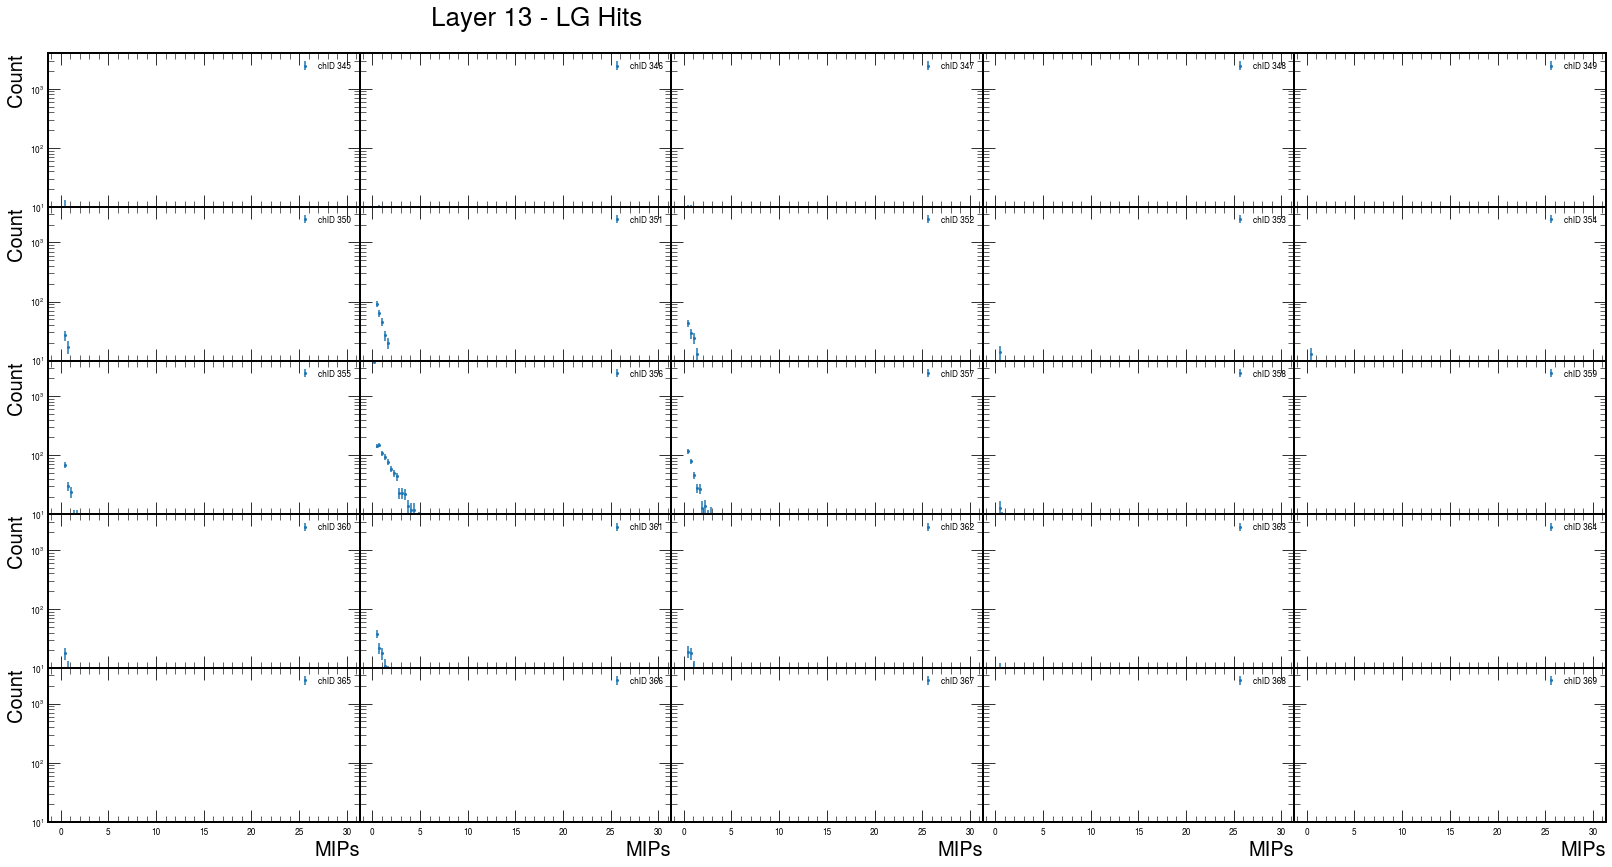

306_LG
307_LG
308_LG
309_LG
310_LG
311_LG
312_LG
313_LG
314_LG
315_LG
316_LG
317_LG
318_LG
319_LG
370_LG
371_LG
372_LG
373_LG
374_LG
375_LG
376_LG
377_LG
378_LG
379_LG
380_LG


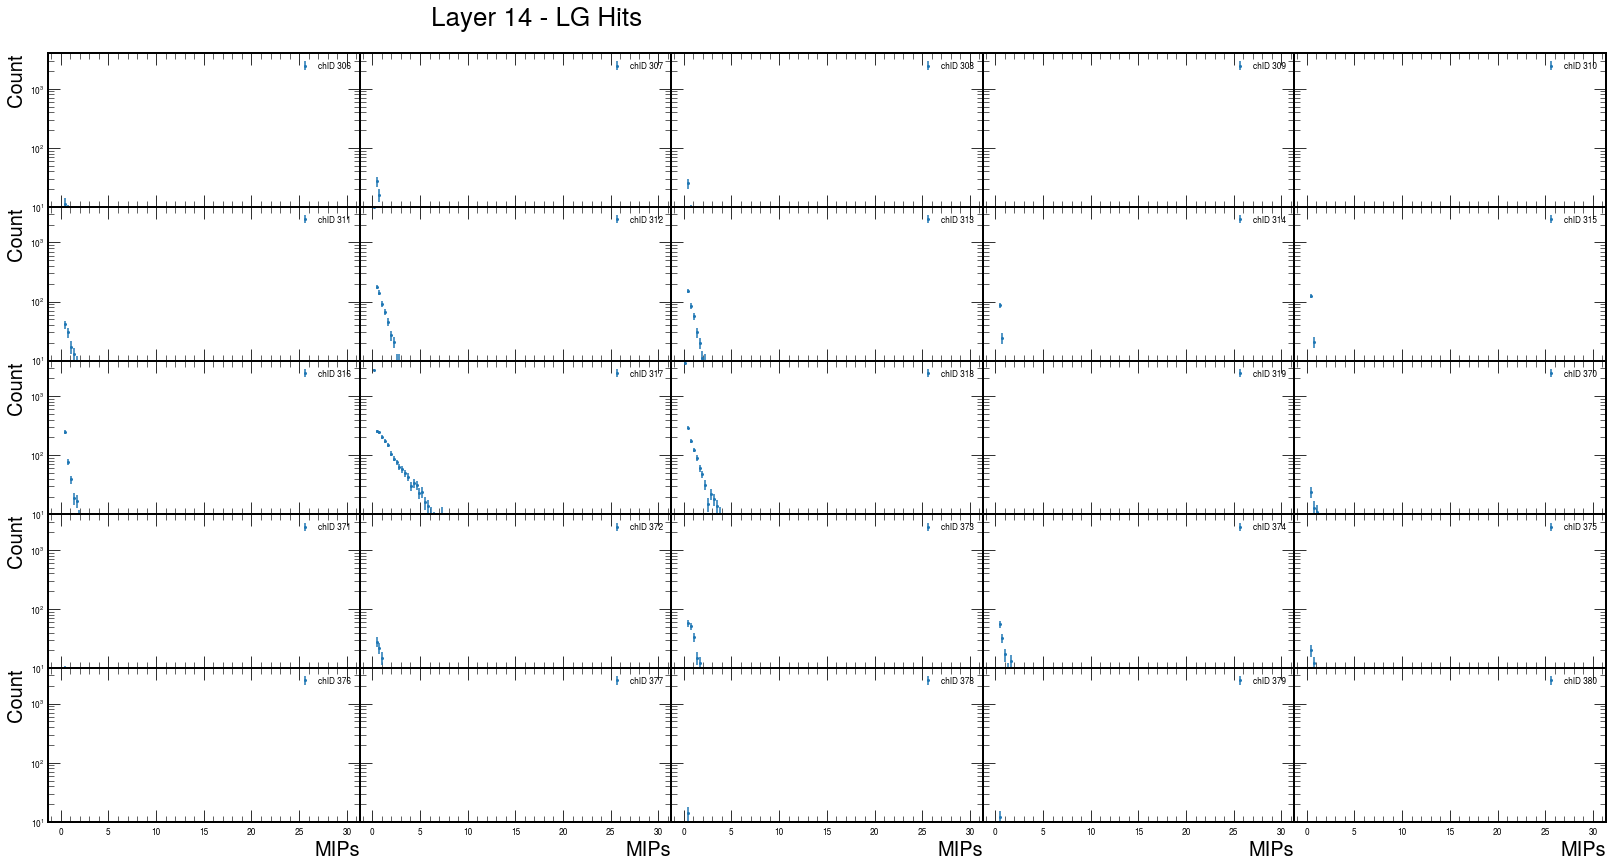

In [166]:
for i in range(15):
    plot_channel_histograms_by_layer(geometry, din, i, bins=100, range_=(0, 30))